판다스 버전 : 1.3.4<br>
kiwipiepy 버전 : 1.7.0

In [1]:
# 라이브러리 버전이 맞지 않을 경우 아래 명령어의 주석을 제거한 후 실행해주세요.
# 이전 예제들을 실행했다면 앞에서 이미 버전을 맞췄습니다.
# !pip install pandas==1.3.4
# !pip install kiwipiepy==1.17.0

In [2]:
# 버전 확인용
import pandas as pd
import kiwipiepy

print("판다스 버전 :", pd.__version__)
print("kiwipiepy 버전 :", kiwipiepy.__version__)

판다스 버전 : 1.3.4
kiwipiepy 버전 : 0.17.0


#### 데이터 불러오기 - 쇼핑몰 데이터

In [3]:
import pandas as pd
import numpy as np
import re
import os

from ast import literal_eval
from collections import Counter
from kiwipiepy import Kiwi

import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='Malgun Gothic')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

C:\Users\it\AppData\Local\Temp\ipykernel_17960\1551560240.py:15: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [4]:
filepath = './data'
df = pd.read_excel(filepath + "/떡볶이_해시태그.xlsx")

In [5]:
print('데이터 크기', df.shape)
df.head(3)

데이터 크기 (118, 9)


,name,tag,likes,num_review,num_photo,url,int_likes,int_photo,int_review
0,제품1,[],"찜457,590",78,(33건),https://cr.shopping.naver.com/adcr.nhn?x=xOdqd...,457590,33,78
1,제품10,[],"찜1,286",86,(36건),https://cr.shopping.naver.com/adcr.nhn?x=Ghq%2...,1286,36,86
2,제품100,"['#즐기는', '#가용비', '#곱창떡볶이', '#떡볶이', '#곱창', '#간편...","찜12,550","1,262",(489건),https://cr.shopping.naver.com/adcr.nhn?x=KFUyA...,12550,489,1262


#### 데이터 전처리 - 가중치 구하기

In [6]:
likes_rank=df['int_likes'].rank(method='dense')
photo_rank=df['int_photo'].rank(method='dense')
review_rank=df['int_review'].rank(method='dense')
df['Rank'] = likes_rank + photo_rank + review_rank

In [7]:
review_rank

0       1.0
1       5.0
2      83.0
3      84.0
4      85.0
       ... 
113    78.0
114    79.0
115    80.0
116    81.0
117    82.0
Name: int_review, Length: 118, dtype: float64

In [8]:
df.sort_values(by='Rank', ascending=False, inplace=True)

In [9]:
display(df.head(4))
display(df.tail(4))

,name,tag,likes,num_review,num_photo,url,int_likes,int_photo,int_review,Rank
14,제품111,[],"찜888,458","3,282","(1,743건)",https://cr.shopping.naver.com/adcr.nhn?x=3qAfU...,888458,1743,3282,241.0
13,제품110,[],"찜888,476","3,092","(1,596건)",https://cr.shopping.naver.com/adcr.nhn?x=IbFuI...,888476,1596,3092,240.0
5,제품103,[],"찜888,548","1,639","(1,103건)",https://cr.shopping.naver.com/adcr.nhn?x=xFmZS...,888548,1103,1639,233.0
18,제품115,"['#홈파티음식', '#어린이간식', '#집들이음식', '#생일음식', '#까르보나...","찜100,482","9,366","(3,123건)",https://cr.shopping.naver.com/adcr.nhn?x=mphl6...,100482,3123,9366,227.0


,name,tag,likes,num_review,num_photo,url,int_likes,int_photo,int_review,Rank
24,제품13,"['#매운떡볶이', '#쫀득한', '#맛있는떡', '#냠냠맛있는', '#간단식사',...","찜4,300",89,(45건),https://cr.shopping.naver.com/adcr.nhn?x=dAL4W...,4300,45,89,32.0
12,제품11,"['#아이들간식', '#떡볶이떡', '#간편조리', '#야식', '#매콤한', '#...","찜8,558",87,(28건),https://cr.shopping.naver.com/adcr.nhn?x=lJGHa...,8558,28,87,32.0
52,제품4,[],"찜8,173",81,(23건),https://cr.shopping.naver.com/adcr.nhn?x=%2B%2...,8173,23,81,23.0
1,제품10,[],"찜1,286",86,(36건),https://cr.shopping.naver.com/adcr.nhn?x=Ghq%2...,1286,36,86,20.0


In [10]:
df['qcut']=pd.qcut(df['Rank'], q=5, labels=[1,2,3,4,5])
df['qcut'] = df['qcut'].astype('int')

In [11]:
display(df.head(2))
display(df.tail(2))

,name,tag,likes,num_review,num_photo,url,int_likes,int_photo,int_review,Rank,qcut
14,제품111,[],"찜888,458","3,282","(1,743건)",https://cr.shopping.naver.com/adcr.nhn?x=3qAfU...,888458,1743,3282,241.0,5
13,제품110,[],"찜888,476","3,092","(1,596건)",https://cr.shopping.naver.com/adcr.nhn?x=IbFuI...,888476,1596,3092,240.0,5


,name,tag,likes,num_review,num_photo,url,int_likes,int_photo,int_review,Rank,qcut
52,제품4,[],"찜8,173",81,(23건),https://cr.shopping.naver.com/adcr.nhn?x=%2B%2...,8173,23,81,23.0,1
1,제품10,[],"찜1,286",86,(36건),https://cr.shopping.naver.com/adcr.nhn?x=Ghq%2...,1286,36,86,20.0,1


#### 데이터 분석 - 자주 등장하는 떡볶이 해시태그 찾기

In [12]:
# 가중치 계산, 랭킹을 로그를 취해 결과값 만큼 태그를 반복 시켰다
tag_list = []
for i in range(len(df['tag'])):
    tmp = literal_eval(df['tag'][i])
    tmp_weight = tmp*df['qcut'][i]
    tag_list.append(tmp_weight)

In [13]:
df['tag_weight'] = tag_list

In [14]:
tags_weight = sum(tag_list, [])

In [15]:
count_result = Counter(tags_weight).most_common()

In [16]:
keys = []
counts = []
for i in range(len(count_result)):
    key = count_result[i][0]
    cnt = count_result[i][1]
    
    keys.append(key)
    counts.append(cnt)
    
df_tag_count = pd.DataFrame({"해시태그":keys, "빈도":counts})

In [17]:
df_tag_count[:50]

,해시태그,빈도
0,#떡볶이,71
1,#밀키트,43
2,#국물떡볶이,42
3,#떡볶이소스,40
4,#즉석떡볶이,39
5,#밀떡볶이,36
6,#캠핑요리,31
7,#떡볶이떡,31
8,#매운떡볶이,28
9,#떡볶이양념,22


In [18]:
df_outdoor = df_tag_count.iloc[[6, 25, 48]]
df_indoor = df_tag_count.iloc[[1,11,13,21,24,29,43]]

Text(0.5, 0, '등장 빈도')

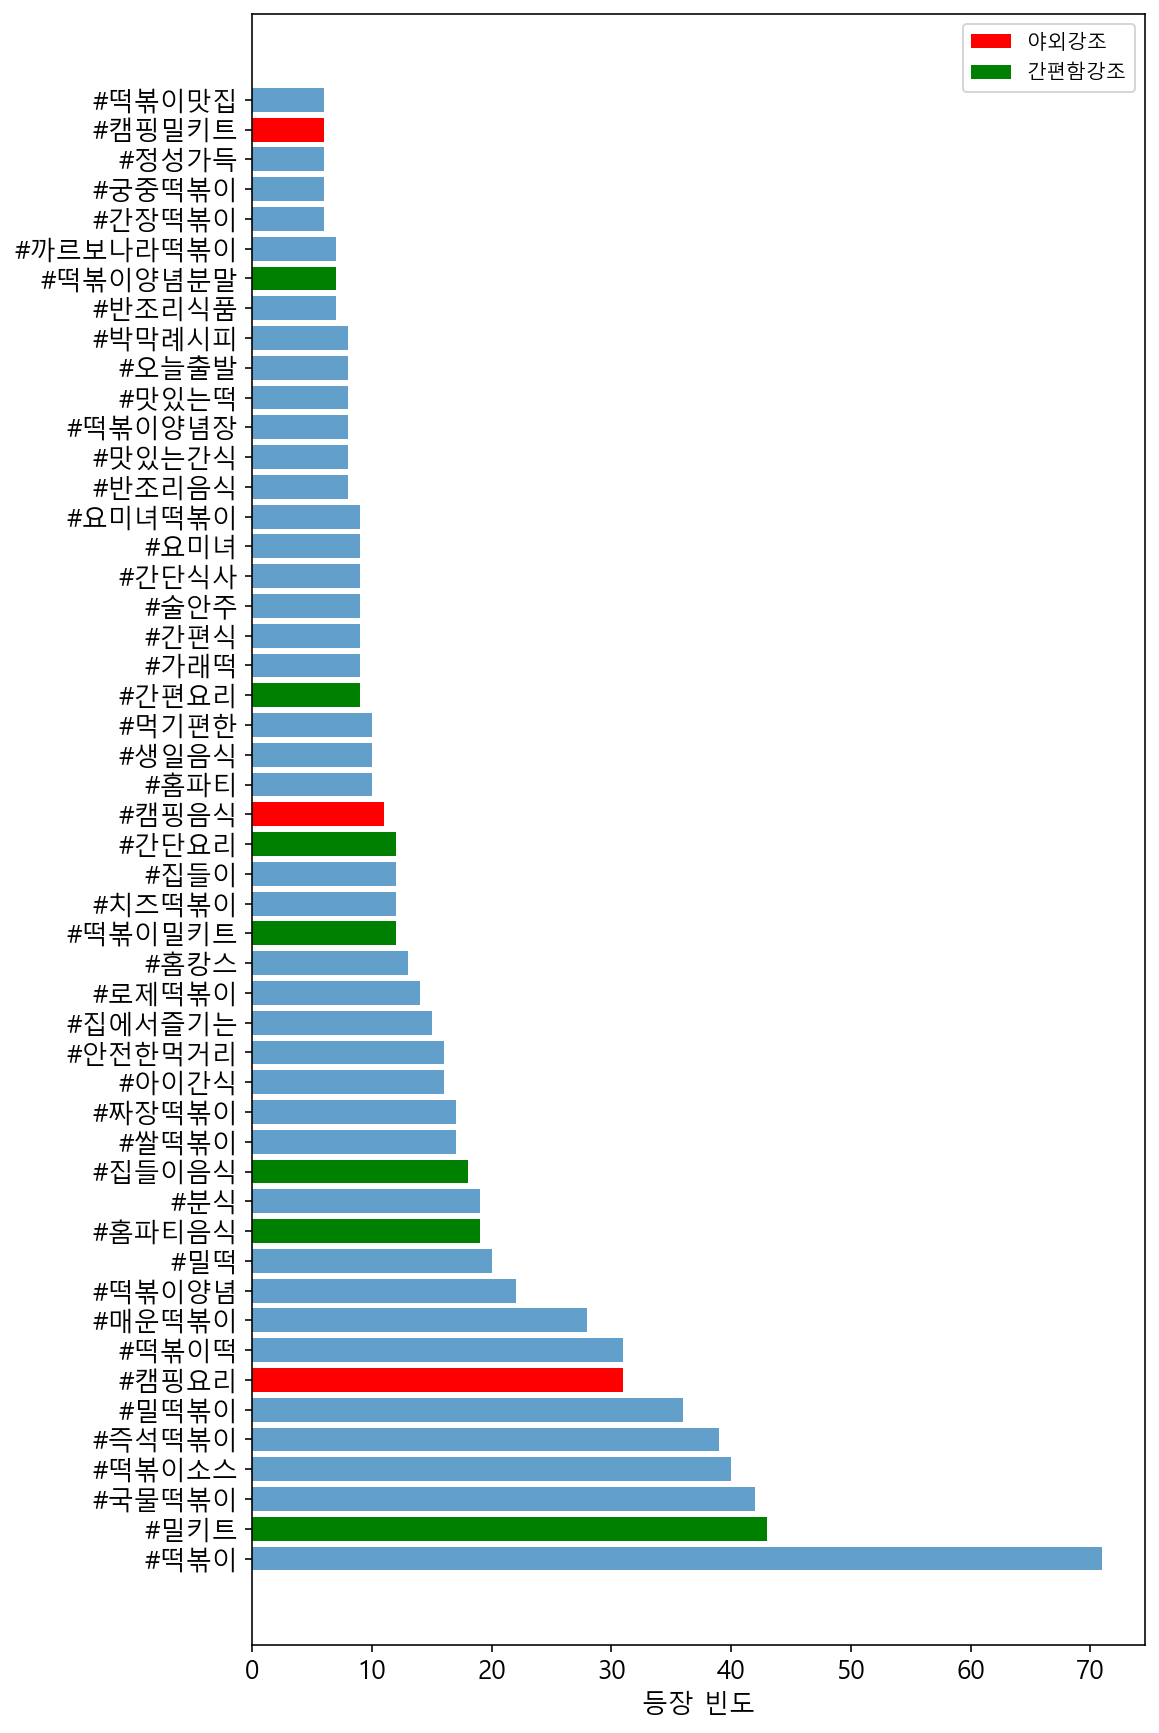

In [19]:
plt.figure(figsize=(8,15))
plt.barh(df_tag_count['해시태그'][:50], df_tag_count['빈도'][:50], alpha=0.7)
plt.barh(df_outdoor['해시태그'], df_outdoor['빈도'], color='r', label='야외강조')
plt.barh(df_indoor['해시태그'], df_indoor['빈도'], color='g', label='간편함강조')
plt.legend(loc='upper right')
plt.yticks(size=13)
plt.xticks(size=13)
plt.xlabel('등장 빈도', size=13)

#### 데이터 불러오기   – 떡볶이 제품 리뷰 데이터

In [20]:
filepath = './data'
df = pd.read_excel(filepath + "/떡볶이_리뷰데이터.xlsx")

In [21]:
df.shape

(59055, 6)

In [22]:
df.head(3)

,name,int_likes,int_photo,int_review,reviews,price
0,제품100,12550,489,1262,"곱창전골맛이 많이 날줄 알았는데, 먹어보니 떡뽁이맛에 곱창이 들어가 있지만, 잘 어...",11900
1,제품100,12550,489,1262,타임세일해서 2개 구매했어요. 냉동 안되서 아쉽게 2개만ㅜㅜ 곱창도 좋아하고 떡볶이...,11900
2,제품100,12550,489,1262,포장 깔끔하게 배송되었어요~~~\n간편하게 맛있게 잘 먹었어요\n소스를 다 넣었더...,11900


#### 데이터 전처리 – 정규표현식

In [23]:
df_1 = df.copy()
df_1.isnull().sum()

name          0
int_likes     0
int_photo     0
int_review    0
reviews       0
price         0
dtype: int64

In [24]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59055 entries, 0 to 59054
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        59055 non-null  object
 1   int_likes   59055 non-null  int64 
 2   int_photo   59055 non-null  int64 
 3   int_review  59055 non-null  int64 
 4   reviews     59055 non-null  object
 5   price       59055 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.7+ MB


In [25]:
df_1.drop_duplicates(subset='reviews', inplace=True)
df_1['reviews_kor'] = df_1['reviews'].apply(lambda x:" ".join(re.compile("[가-힣]+").findall(x))) 

In [26]:
kiwi = Kiwi()

def find_nouns_verb_adject(text):
    """입력된 문장에서 명사, 동사, 형용사 추출해 리스트로 반환"""
    
    tokens = kiwi.tokenize(text)
    
    target_idxs = []
    target_words = []
    for idx, wrd in enumerate(tokens):
        if 'NN' in wrd.tag:
            if len(wrd.form)>1:
                target_words.append(wrd.form)
                target_idxs.append('noun')
        elif ('VV' in wrd.tag) or ('VA' in wrd.tag) or ('XSV' in wrd.tag):
            tmp_form = wrd.form + "다"
            target_words.append(tmp_form)           
            target_idxs.append('verb')
            
    return target_words, target_idxs

def find_intension_one_text(words, words_tag):
    """문장내 의도를 나타내는 단어를 추출한다"""
    intensions=[]
    for idx, tag in enumerate(words_tag):
        try:
            if tag=='verb':
                word = "".join(words[idx-1:idx+1])
                intensions.append(word)
            elif (tag=='noun') and (words_tag[idx+1]!='verb'):
                intensions.append(words[idx])
        except:
            intensions.append(words[idx])
    
    return intensions

def find_intension(text):
    """입력된 문장에서 의도를 찾아서 반환한다"""
    target_words, target_idxs = find_nouns_verb_adject(text)
    intensions = find_intension_one_text(target_words, target_idxs )
    return intensions

In [27]:
df_1['주요표현'] = df_1['reviews_kor'].apply(lambda x:find_intension(x))

In [28]:
df_1.head(3)

,name,int_likes,int_photo,int_review,reviews,price,reviews_kor,주요표현
0,제품100,12550,489,1262,"곱창전골맛이 많이 날줄 알았는데, 먹어보니 떡뽁이맛에 곱창이 들어가 있지만, 잘 어...",11900,곱창전골맛이 많이 날줄 알았는데 먹어보니 떡뽁이맛에 곱창이 들어가 있지만 잘 어울리...,"[곱창, 전골나다, 나다알다, 알다먹다, 곱창들어가다, 들어가다어울리다, 어울리다맛..."
1,제품100,12550,489,1262,타임세일해서 2개 구매했어요. 냉동 안되서 아쉽게 2개만ㅜㅜ 곱창도 좋아하고 떡볶이...,11900,타임세일해서 개 구매했어요 냉동 안되서 아쉽게 개만 곱창도 좋아하고 떡볶이도 무지 ...,"[타임, 세일하다, 구매하다, 냉동되다, 되다아쉽다, 곱창좋아하다, 떡볶이좋아하다,..."
2,제품100,12550,489,1262,포장 깔끔하게 배송되었어요~~~\n간편하게 맛있게 잘 먹었어요\n소스를 다 넣었더...,11900,포장 깔끔하게 배송되었어요 간편하게 맛있게 잘 먹었어요 소스를 다 넣었더니 제 입맛...,"[포장, 배송되다, 되다간편하다, 간편하다맛있다, 맛있다먹다, 소스넣다, 입맛짜다,..."


In [29]:
find_intension(text="세일할 때 원플러스원으로 샀어요. 간편하게 맛있게 잘 먹었어요")

['세일하다', '플러스사다', '사다간편하다', '간편하다맛있다', '맛있다먹다']

#### 데이터 분석 – 다빈도 표현 분석

In [30]:
keywords = sum(df_1['주요표현'].tolist(), [])

In [31]:
keywords = [key for key in keywords if len(key)>1]

In [32]:
keywords_count = Counter(keywords).most_common()

keys = []
counts = []
for i in range(len(keywords_count)):    
    keys.append(keywords_count[i][0])
    counts.append(keywords_count[i][1])
    
df_key_count = pd.DataFrame({"keyword":keys, "count":counts})

In [33]:
df_key_count.sample(3)

,keyword,count
13531,많다신선하다,1
17954,분식만들다,1
1499,베이컨넣다,20


In [34]:
def find_nouns(keyword):
    """명사 태그 반환"""
    tokens = kiwi.tokenize(keyword)
    for token in tokens:
        if 'NN' in token.tag:
            return 'Noun'
        else:
            break
    return 'ETC'

In [35]:
df_key_count['tag'] = df_key_count['keyword'].apply(lambda x:find_nouns(x))

In [36]:
df_key_count

,keyword,count,tag
0,주문하다,5439,Noun
1,구매하다,4918,Noun
2,떡볶이,4609,Noun
3,맛있다먹다,4399,ETC
4,하다먹다,3984,ETC
...,...,...,...
36000,취져,1,Noun
36001,버무리다조리다,1,ETC
36002,조리다좋다,1,Noun
36003,맛없다거리다,1,ETC


In [37]:
df_key_count_nouns = df_key_count[(df_key_count['tag']=='Noun') & (df_key_count['count']>5)]

In [38]:
df_key_count_nouns[:200]

,keyword,count,tag
0,주문하다,5439,Noun
1,구매하다,4918,Noun
2,떡볶이,4609,Noun
6,배송빠르다,2334,Noun
7,배송,1875,Noun
...,...,...,...
340,제품좋다,96,Noun
341,메뉴,95,Noun
342,신랑,95,Noun
343,어묵들다,95,Noun


#### 데이터 분석 - 떡볶이 소비 환경 분석

In [39]:
def find_infoods(keyword_tokens):
    """떡볶이 속재료 찾기"""
    in_foods = ['국물','로제','치즈','어묵','밀떡','야채','사과','바지락','양배추',
                '사리','쌀떡', '당면','오뎅','크림','두부','양파','짜장','간장','궁중']
    fd_list = []
    for fd in in_foods:
        for token in keyword_tokens:
            if fd in token:
                fd_list.append(fd)
    result_result = list(set(list(fd_list)))
    return " ".join(result_result)

def find_outfoods(keyword_tokens):
    """떡볶이랑 같이 먹는 요리 찾기"""
    out_foods = ['라면','곱창','고기','순대','만두','튀김']
    
    fd_list = []
    for fd in out_foods:
        for token in keyword_tokens:
            if fd in token:
                fd_list.append(fd)
    result_result = list(set(list(fd_list)))
    return " ".join(result_result)

def find_places(keyword_tokens):
    """떡볶이 먹는 장소 찾기"""
    places = ['캠핑','집','편의점','공원','학원','백화점','분식','마차','거리','식당']
    
    place_list = []
    for fd in places:
        for token in keyword_tokens:
            if fd in token:
                place_list.append(fd)
    result_result = list(set(list(place_list)))
    return " ".join(result_result)

In [40]:
df_2 = df_1.copy()

In [41]:
df_2['장소'] = df_2['주요표현'].apply(lambda x:find_places(x))
df_2['함께먹는요리'] = df_2['주요표현'].apply(lambda x:find_outfoods(x))
df_2['속재료'] = df_2['주요표현'].apply(lambda x:find_infoods(x))

In [42]:
df_2['주요키워드'] = df_2['장소'] + " " + df_2['함께먹는요리'] + " " + df_2['속재료']

In [43]:
df_2.head(5)

,name,int_likes,int_photo,int_review,reviews,price,reviews_kor,주요표현,장소,함께먹는요리,속재료,주요키워드
0,제품100,12550,489,1262,"곱창전골맛이 많이 날줄 알았는데, 먹어보니 떡뽁이맛에 곱창이 들어가 있지만, 잘 어...",11900,곱창전골맛이 많이 날줄 알았는데 먹어보니 떡뽁이맛에 곱창이 들어가 있지만 잘 어울리...,"[곱창, 전골나다, 나다알다, 알다먹다, 곱창들어가다, 들어가다어울리다, 어울리다맛...",,곱창,,곱창
1,제품100,12550,489,1262,타임세일해서 2개 구매했어요. 냉동 안되서 아쉽게 2개만ㅜㅜ 곱창도 좋아하고 떡볶이...,11900,타임세일해서 개 구매했어요 냉동 안되서 아쉽게 개만 곱창도 좋아하고 떡볶이도 무지 ...,"[타임, 세일하다, 구매하다, 냉동되다, 되다아쉽다, 곱창좋아하다, 떡볶이좋아하다,...",,라면 곱창,야채,라면 곱창 야채
2,제품100,12550,489,1262,포장 깔끔하게 배송되었어요~~~\n간편하게 맛있게 잘 먹었어요\n소스를 다 넣었더...,11900,포장 깔끔하게 배송되었어요 간편하게 맛있게 잘 먹었어요 소스를 다 넣었더니 제 입맛...,"[포장, 배송되다, 되다간편하다, 간편하다맛있다, 맛있다먹다, 소스넣다, 입맛짜다,...",,,,
3,제품100,12550,489,1262,캠핑안주로 딱입니당~!\n만두랑 오징어 토핑햇어용 ㅋㅋ,11900,캠핑안주로 딱입니당 만두랑 오징어 토핑햇어용,"[캠핑, 안주, 만두, 오징어, 토핑하다]",캠핑,만두,,캠핑 만두
4,제품100,12550,489,1262,캠핑 가서 몇번을먹었는지 몰라요\n그리들에 최고입니다,11900,캠핑 가서 몇번을먹었는지 몰라요 그리들에 최고입니다,"[캠핑가다, 가다먹다, 먹다모르다, 최고]",캠핑,,,캠핑


In [44]:
df_2['장소'].value_counts()[:10]

        57873
캠핑        489
집         295
거리        122
집 분식      105
분식         76
식당         44
편의점        16
집 거리        7
백화점         5
Name: 장소, dtype: int64

In [45]:
df_2['함께먹는요리'].value_counts()[:15]

         56640
라면         499
곱창         471
고기         420
순대         317
만두         312
튀김         289
만두 튀김       15
순대 만두       14
만두 라면       13
순대 튀김       12
고기 라면       10
라면 곱창        8
만두 고기        5
순대 고기        5
Name: 함께먹는요리, dtype: int64

In [46]:
df_2['속재료'].value_counts()[:15]

       52197
어묵      1130
국물       856
오뎅       529
로제       512
치즈       487
짜장       359
야채       343
사리       299
두부       239
당면       175
사과       160
크림       155
바지락      134
양배추      101
Name: 속재료, dtype: int64

In [47]:
df_2['주요키워드'].value_counts()[:20]

        49591
  어묵     1052
  국물      758
  로제      485
  오뎅      481
  치즈      464
캠핑        418
 곱창       383
  짜장      337
 고기       335
 순대       277
  야채      268
  두부      238
집         219
 만두       217
 튀김       207
  당면      159
  사과      155
 라면       152
  크림      150
Name: 주요키워드, dtype: int64

In [48]:
space_emetpy_keywords = sum(df_2[df_2['장소']=='']['주요표현'].tolist(), [])

In [49]:
Counter(space_emetpy_keywords).most_common(30)

[('', 25628),
 ('주문하다', 5221),
 ('구매하다', 4788),
 ('떡볶이', 4344),
 ('맛있다먹다', 4283),
 ('하다먹다', 3820),
 ('먹다맛있다', 2720),
 ('배송빠르다', 2309),
 ('배송', 1832),
 ('먹다좋다', 1778),
 ('하다맛있다', 1747),
 ('구매', 1510),
 ('만족', 1476),
 ('감사하다', 1473),
 ('떡볶이맛있다', 1371),
 ('시키다먹다', 1257),
 ('포장', 1191),
 ('아이먹다', 1102),
 ('사다먹다', 1083),
 ('먹다있다', 1081),
 ('있다좋다', 1020),
 ('최고', 985),
 ('추가하다', 954),
 ('떡볶이먹다', 904),
 ('넣다먹다', 898),
 ('맛있다', 880),
 ('아이', 854),
 ('조리하다', 834),
 ('떡볶이하다', 800),
 ('구입하다', 766)]